In [6]:
import os

base_dir = './data/cats_and_dogs_small/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [5]:
from tensorflow import optimizers
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

/var/folders/2y/6zpyxsv91h5f6rkk2bhks16c0000gp/T/ipykernel_83418/4034251495.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
100/100 [==============================] - 26s 253ms/step - loss: 0.6901 - acc: 0.5375 - val_loss: 0.6767 - val_acc: 0.5760
Epoch 2/30
100/100 [==============================] - 25s 252ms/step - loss: 0.6477 - acc: 0.6175 - val_loss: 0.6634 - val_acc: 0.5780
Epoch 3/30
100/100 [==============================] - 26s 256ms/step - loss: 0.6047 - acc: 0.6605 - val_loss: 0.6169 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 26s 259ms/step - loss: 0.5652 - acc: 0.7050 - val_loss: 0.6020 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 26s 264ms/step - loss: 0.5339 - acc: 0.7235 - val_loss: 0.5869 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 26s 262ms/step - loss: 0.5109 - acc: 0.7475 - val_loss: 0.5712 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 26s 265ms/step - loss: 0.4838 - acc: 0.7650 - val_loss: 0.5774 - val_acc: 0.6830
Epoch 8/30
100/100 [==============================] - 2

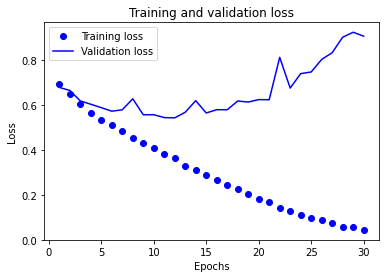

In [10]:
import matplotlib.pyplot as plt


def print_train_val_loss(history_dict):
    plt.clf()
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


print_train_val_loss(history.history)


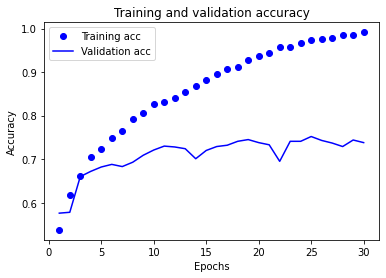

In [13]:
def print_train_val_acc(history_dict):
    plt.clf()
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    epochs = range(1, len(val_acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


print_train_val_acc(history.history)

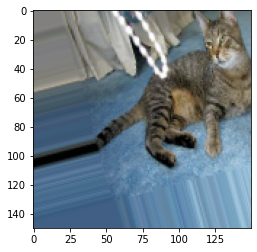

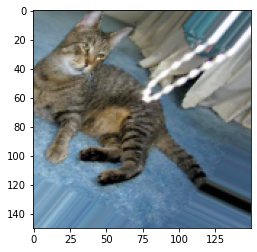

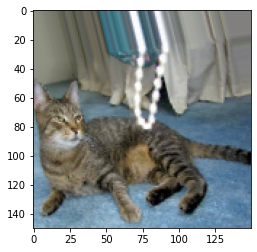

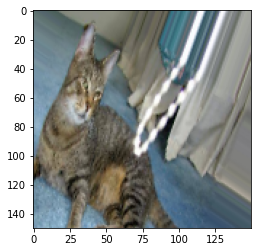

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# 选择一张图片
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
# 转为向量, 形状为(150, 150, 3)
x = image.img_to_array(img)
# 给单个数据增加一个批量的维度，形状改为(1,150,150,3)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i + 1
    if i % 4 == 0:
        break

plt.show()



In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])


In [21]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_2.h5')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/var/folders/2y/6zpyxsv91h5f6rkk2bhks16c0000gp/T/ipykernel_83418/3887350708.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
10/10 [==============================] - 7s 757ms/step - loss: 0.6820 - acc: 0.5500 - val_loss: 0.7021 - val_acc: 0.5000
Epoch 2/100
10/10 [==============================] - 4s 379ms/step - loss: 0.6850 - acc: 0.5531
Epoch 3/100
10/10 [==============================] - 4s 356ms/step - loss: 0.6823 - acc: 0.5724
Epoch 4/100
10/10 [==============================] - 4s 383ms/step - loss: 0.6817 - acc: 0.5594
Epoch 5/100
 4/10 [===========>..................] - ETA: 2s - loss: 0.6834 - acc: 0.4922

KeyboardInterrupt: 

In [ ]:
print_train_val_loss(history.history)
print_train_val_acc(history.history)
